# Analyze the annotation results

The script includes three parts:
1.Data Loading:
    Read mTurk format file and collect annotation data, a part of input data

2.Clustering:
    Gather annotation of coreference into clusters

3.Perform Evaluation
    This include Kappa Cohen, etc.



In [1]:
import csv
import json
from copy import deepcopy
import pickle as pkl
csv.field_size_limit(1131072)

131072

In [2]:
from utils.data_util import gather_by_annotator
from utils.data_util import gather_by_scene
from conll import muc, b_cubed, blanc, ceaf, ceaf_e

In [3]:
from utils.data_util import read_mturk_annotation_multiple_scene
from utils.data_util import read_turkle_annotation_multiple_scene
from utils.data_util import read_annotation

## Part 1: Data Loading

In [4]:
mturk_1 = read_mturk_annotation_multiple_scene('data/pilot_3/mturk.csv')

mturk_2 = read_mturk_annotation_multiple_scene('data/pilot_3/single_annotator.csv')

golden_1 = read_turkle_annotation_multiple_scene('data/pilot_1/golden.csv')
for item in golden_1:
    item['WorkerId'] = "golden"

results = []
results.extend(mturk_1)
results.extend(mturk_2)
results.extend(golden_1)

scenes = gather_by_scene(results)

In [4]:
data = read_turkle_annotation_multiple_scene('data/institute_name_pilot/pilot_1.csv')
golden = read_turkle_annotation_multiple_scene('data/pilot_2/golden.csv')
for item in golden:
    item['WorkerId'] = "golden"

results = []
results.extend(data)
results.extend(golden)
scenes = gather_by_scene(results)

In [4]:
mturk_1 = read_mturk_annotation_multiple_scene('data/pilot_2/data_1.csv')

mturk_2 = read_mturk_annotation_multiple_scene('data/pilot_2/data_2.csv')

mturk_3 = read_mturk_annotation_multiple_scene('data/pilot_1/pilot_1.csv')

mturk_4 = read_mturk_annotation_multiple_scene('data/pilot_1/pilot_2.csv')

golden = read_turkle_annotation_multiple_scene('data/pilot_2/golden.csv')
for item in golden:
    item['WorkerId'] = "golden"

# kate = read_annotation('data/pilot_1/kate.csv')
# for item in kate:
#     item['WorkerId'] = "kate"
#
# user_id_4 = read_annotation('data/pilot_1/user_id_4.csv')
# for item in user_id_4:
#     item['WorkerId'] = "user_id_4"
#
# person_name_1_person_name_2 = read_annotation('data/pilot_1/person_name_1_person_name_2.csv')
# for item in person_name_1_person_name_2:
#     item['WorkerId'] = item['Turkle.Username']

results = []
results.extend(mturk_1)
results.extend(mturk_2)
results.extend(mturk_3)
results.extend(mturk_4)
results.extend(golden)

# results.extend(kate)
# results.extend(user_id_4)

scenes = gather_by_scene(results)

In [11]:
print(scenes)

{":|Where|'d|you|go|?|I|ca|n't": [{'sentences': [['Penny', ':', 'Where', "'d", 'you', 'go', '?', 'I', 'ca', "n't", 'tell', 'if', 'the', 'turkey', "'s", 'done', '!'], ['Leonard', ':', 'Be', 'right', 'there', '!', 'Hi', ',', 'lover', '.'], ['Penny', ':', 'What', 'are', 'you', 'doing', '?'], ['Leonard', ':', 'I', "'", 'm', 'sorry', 'about', 'the', 'journal', '.', 'I', 'want', 'to', 'make', 'it', 'up', 'to', 'you', '.', 'So', 'I', "'", 'm', 'gon', 'na', 'let', 'you', 'post', 'a', 'shame', 'photo', 'of', 'me', 'on', 'Facebook', '.'], ['Penny', ':', 'I', 'am', 'not', 'putting', 'that', 'on', 'the', 'Internet', '!', 'I', 'do', "n't", 'want', 'people', 'to', 'see', 'this', '.', 'I', 'do', "n't", 'want', 'to', 'see', 'it', '!'], ['Leonard', ':', 'Do', "n't", 'want', 'people', 'to', 'see', 'what', ',', 'huh', '?', 'A', 'little', 'bit', 'of', 'this', '?'], ['Penny', ':', 'Oh', '.'], ['Leonard', ':', 'Some', 'of', 'this', '?', 'And', ',', 'since', 'it', "'s", 'Thanksgiving', ',', 'an', 'extra', 'h

In [12]:
with open('annotation_pilot_2.pkl', 'wb') as f:
    pkl.dump(scenes, f)

In [10]:
results = {}
for scene_key in scenes:
    output = {}
    scene = scenes[scene_key]
    print(len(scene[0]['sentences']))
    for anno1 in scene:
        name1 = anno1['WorkerId']
        temp = {}
        for anno2 in scene:
            name2 = anno2['WorkerId']
            # temp[name2] = muc(anno1['clusters_no_plural'], anno2['clusters_no_plural'])
            temp[name2] = muc(anno1['clusters_all'], anno2['clusters_all'])
            # print(b_cubed(anno1['clusters_all'], anno2['clusters_all']))
            # print("1", name1, name2, muc(anno1['clusters_all'], anno2['clusters_all']))
            # print("2", name1, name2, blanc(anno1['clusters_no_plural'], anno2['clusters_no_plural']))
        output[name1] = temp
    results[scene_key] = output

9
11
31


In [11]:
keys = list(results[list(results.keys())[1]].keys())
keys.remove("golden")


temp = [0, 0, 0]
for item_key in results:
    print(item_key)
    item = results[item_key]['golden']
    for response_key in keys:
        # if response_key!="A2NAKIXS3DVGAA":
        #     continue
        for i, x in enumerate(item[response_key]):
            temp[i] += x
        print(response_key, item[response_key])
    print()
print("Average:", [item/(len(results)*(len(results[list(results.keys())[0]])-1)) for item in temp])

:|Where|'d|you|go|?|I|ca|n't
A2RWLFIP23FZA7 (0.8333333333333334, 0.625, 0.7142857142857143)
A2VIKCIM9TZL22 (0.7777777777777778, 0.7, 0.736842105263158)
A1EVYY9TPBYTYB (0.9444444444444444, 0.7727272727272727, 0.85)

:|Oh|,|yeah|,|no|,|this|thing
A2RWLFIP23FZA7 (0.7777777777777778, 0.7777777777777778, 0.7777777777777779)
A2VIKCIM9TZL22 (0.4444444444444444, 0.4, 0.42105263157894735)
A1EVYY9TPBYTYB (0.8888888888888888, 0.8888888888888888, 0.8888888888888888)

:|We|just|wanted|to|see|how|your|class
A2RWLFIP23FZA7 (0.6716417910447762, 0.7377049180327869, 0.7031250000000001)
A2VIKCIM9TZL22 (0.6865671641791045, 0.8846153846153846, 0.7731092436974789)
A1EVYY9TPBYTYB (0.7014925373134329, 0.746031746031746, 0.7230769230769231)

Average: [0.7473742399115533, 0.7258606653415396, 0.732017587174321]


In [22]:
print(len(results))
print(len(results[list(results.keys())[0]])-1)

3
2


In [7]:
(0.85+0.89+0.72)/3

0.82

In [ ]:
keys = list(results[list(results.keys())[1]].keys())
keys.remove("golden")

for scene_key in results:
    print(scene_key)
    scene = results[scene_key]
    print("A2L9763BW12NLA", scene['golden']["A2L9763BW12NLA"])
    # for item in keys:
    #     print(item, scene['golden'][item])
    print()

In [8]:
from conll import muc, b_cubed, blanc, ceaf, ceaf_e
results = {}
for scene_key in scenes:
    output = {}
    scene = scenes[scene_key]
    print(len(scene[0]['sentences']))
    for anno1 in scene:
        name1 = anno1['WorkerId']
        temp = {}
        for anno2 in scene:
            name2 = anno2['WorkerId']
            temp[name2] = muc(anno1['clusters_all'], anno2['clusters_all'])
            # print(b_cubed(anno1['clusters_all'], anno2['clusters_all']))
            # print("1", name1, name2, muc(anno1['clusters_all'], anno2['clusters_all']))
            # print("2", name1, name2, blanc(anno1['clusters_no_plural'], anno2['clusters_no_plural']))
        output[name1] = temp
    results[scene_key] = output

9
11
31


In [9]:
for item in results:
    print(item)
    for name1 in results[item]:
        for name2 in results[item]:
            if name1==name2:
                continue
            print(name1+"_"+name2, results[item][name1][name2])
    print()

:|Where|'d|you|go|?|I|ca|n't
ATR6RB1RULOC0_A39L5W9N08RN33 (0.8125, 0.6842105263157895, 0.7428571428571429)
ATR6RB1RULOC0_A2NAKIXS3DVGAA (0.9375, 0.8823529411764706, 0.9090909090909091)
ATR6RB1RULOC0_golden (1.0, 0.8421052631578947, 0.9142857142857143)
A39L5W9N08RN33_ATR6RB1RULOC0 (0.6842105263157895, 0.8125, 0.7428571428571429)
A39L5W9N08RN33_A2NAKIXS3DVGAA (0.7368421052631579, 0.8235294117647058, 0.7777777777777777)
A39L5W9N08RN33_golden (0.7894736842105263, 0.7894736842105263, 0.7894736842105263)
A2NAKIXS3DVGAA_ATR6RB1RULOC0 (0.8823529411764706, 0.9375, 0.9090909090909091)
A2NAKIXS3DVGAA_A39L5W9N08RN33 (0.8235294117647058, 0.7368421052631579, 0.7777777777777777)
A2NAKIXS3DVGAA_golden (1.0, 0.8947368421052632, 0.9444444444444444)
golden_ATR6RB1RULOC0 (0.8421052631578947, 1.0, 0.9142857142857143)
golden_A39L5W9N08RN33 (0.7894736842105263, 0.7894736842105263, 0.7894736842105263)
golden_A2NAKIXS3DVGAA (0.8947368421052632, 1.0, 0.9444444444444444)

:|Oh|,|yeah|,|no|,|this|thing
ATR6RB1RUL

In [175]:
print(data[0].keys())
print(data[0]['clusters_all'])

dict_keys(['sentences', 'query_spans', 'answer_spans', 'Turkle.Username', 'clusters_all', 'clusters_no_plural', 'answers'])
[{('0_4_5',), ('4_7_8',), ('7_8_9',), ('Leonard',), ('8_2_3',), ('11_6_7',), ('5_3_4',), ('4_2_3',), ('10_4_5',), ('2_4_5',), ('3_5_6',)}, {('0_8_10',)}, {('Sheldon',), ('10_9_10',), ('1_5_6',), ('11_22_23',), ('11_3_4',)}, {('10_16_18',), ('1_5_9',)}, {('3_7_8',), ('2_8_9',)}, {('2_10_11',)}, {('Penny',), ('5_7_8',)}, {('7_4_5',), ('6_10_13',)}, {('9_2_3',)}, {('10_10_13',)}, {('10_14_15',), ('10_21_22',), ('Leonard', 'Sheldon'), ('12_3_4',)}, {('10_23_25',)}, {('11_8_11',)}, {('14_7_9',)}]


In [97]:
a = [(0, 0, 1), (2, 0, 1), (4, 0, 1), (6, 0, 1), (8, 0, 1), (10, 0, 1), (12, 0, 1), (14, 0, 1), (16, 0, 1), (18, 0, 1), (20, 0, 1), (22, 0, 1), (24, 0, 1), (26, 0, 1), (28, 0, 1), (31, 0, 1)]
a.remove((0,0,1))
print(a)
print()

a.remove((-1, -1, -2))
print(a)
print()

[(2, 0, 1), (4, 0, 1), (6, 0, 1), (8, 0, 1), (10, 0, 1), (12, 0, 1), (14, 0, 1), (16, 0, 1), (18, 0, 1), (20, 0, 1), (22, 0, 1), (24, 0, 1), (26, 0, 1), (28, 0, 1), (31, 0, 1)]



ValueError: list.remove(x): x not in list

In [95]:
a.remove((0,0,1))

In [96]:
print(a)

[(2, 0, 1), (4, 0, 1), (6, 0, 1), (8, 0, 1), (10, 0, 1), (12, 0, 1), (14, 0, 1), (16, 0, 1), (18, 0, 1), (20, 0, 1), (22, 0, 1), (24, 0, 1), (26, 0, 1), (28, 0, 1), (31, 0, 1)]


In [25]:
# # Load Kate Annotation
# kate = read_annotation('data/kate.csv')
# for item in kate:
#     item['Turkle.Username'] = "user_id_3"
#
# user_id_4 = read_annotation('data/user_id_4.csv')
# for item in user_id_4:
#     item['Turkle.Username'] = "user_id_4"
#
# golden = read_annotation('data/golden.csv')
# for item in golden:
#     item['Turkle.Username'] = "adjudicated"
#
# person_name_1_person_name_2 = read_annotation('data/results.csv')
#
# results = []
# results.extend(kate)
# results.extend(person_name_1_person_name_2)
# results.extend(user_id_4)
# results.extend(golden)


# Load Kate Annotation
pilot_2 = read_annotation('data/pilot_2.csv')

results = []
results.extend(pilot_2)

scenes = gather_by_scene(results)

In [17]:
# for scene_key in scenes:
#     print(scene_key)
#     for item in scenes[scene_key]:
#         print(item['Turkle.Username'])
#         for x in item['clusters_all']:
#             print(x)

# Part 2: Evaluation with self-implemented MUC

In [26]:
from conll import muc, b_cubed, blanc, ceaf, ceaf_e

In [27]:
results = {}
for scene_key in scenes:
    output = {}
    scene = scenes[scene_key]
    print(len(scene[0]['sentences']))
    for anno1 in scene:
        name1 = anno1['Turkle.Username']
        temp = {}
        for anno2 in scene:
            name2 = anno2['Turkle.Username']
            temp[name2] = ceaf_e(anno1['clusters_all'], anno2['clusters_all'])
            # print(b_cubed(anno1['clusters_all'], anno2['clusters_all']))
            # print("1", name1, name2, muc(anno1['clusters_all'], anno2['clusters_all']))
            # print("2", name1, name2, blanc(anno1['clusters_no_plural'], anno2['clusters_no_plural']))
        output[name1] = temp
    results[scene_key] = output

15
32
41


In [30]:
for item in results[":|Ok|,|I|'m|leaving|for|the|conference"]:
    print(item)

user_id_2
bzheng
person_name_3y


In [45]:
for item in results:
    print(item)
    for name1 in results[item]:
        for name2 in results[item]:
            if name1==name2:
                continue
            print(name1+"_"+name2, results[item][name1][name2])
    print()

:|Ok|,|I|'m|leaving|for|the|conference
user_id_2_bzheng (0.7958677685950413, 0.7295454545454545, 0.7612648221343873)
user_id_2_person_name_3y (0.6272530499803227, 0.7666426166426166, 0.6899783549783549)
bzheng_user_id_2 (0.7295454545454545, 0.7958677685950413, 0.7612648221343873)
bzheng_person_name_3y (0.5329365079365079, 0.7105820105820105, 0.6090702947845805)
person_name_3y_user_id_2 (0.7666426166426166, 0.6272530499803227, 0.6899783549783549)
person_name_3y_bzheng (0.7105820105820106, 0.5329365079365079, 0.6090702947845805)

:|So|,|in|conclusion|,|the|data|show
user_id_2_person_name_3y (0.521268745014875, 0.7032991004168947, 0.5987546395441131)
person_name_3y_user_id_2 (0.7032991004168948, 0.521268745014875, 0.5987546395441131)

:|Are|you|guys|still|not|talking|to|each
user_id_2_person_name_3y (0.6331255411255412, 0.7305294705294706, 0.6783487940630799)
user_id_2_bzheng (0.8387012987012987, 0.8169168493843819, 0.8276657552973343)
person_name_3y_user_id_2 (0.7305294705294705, 0.63312

In [33]:
keys = ['person_name_3y', 'bzheng', 'user_id_2']

temp = [0, 0, 0]
for item_key in results:
    item = results[item_key]['adjudicated']
    for response_key in keys:
        for i, x in enumerate(item[response_key]):
            temp[i] += x

        print(response_key, item[response_key])
    print()
    # for name1 in keys:
    #     for name2 in keys:
    #         print(name1, name2, item[name1][name2])
# print([x/12 for x in temp])

TypeError: unsupported operand type(s) for +=: 'int' and 'str'

KeyError: 'bzheng'

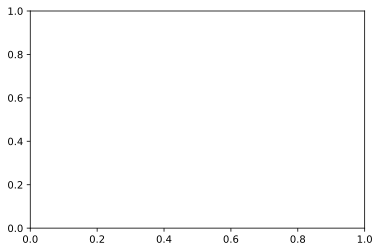

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

fig, ax =plt.subplots(1,1)

keys = ['user_id_2', 'person_name_3y', 'bzheng']
# print("Key  ", "Response", "Recall", "")
x_names = ["Recall", "Precision", "F1"]
data = []
for i, item_key in enumerate(results):
    # if i!=2:
    #     continue
    item = results[item_key]
    # data = []
    y_names = []
    for i in range(len(keys)):
        for j in range(i+1, len(keys)):
            name1 = keys[i]
            name2 = keys[j]
            # print(name1, name2, [float(str(x)[:6]) for x in item[name1][name2]])
            data.append([float(str(x)[:6]) for x in item[name1][name2]])
            y_names.append(name1+"_"+name2)
    # temp = [0, 0, 0]
    # for item in data:
    #     for i in range(len(item)):
    #         temp[i] += item[i]
    # print([float(str(x/6)[:6]) for x in temp])
    # data.append([float(str(x/6)[:6]) for x in temp])
    # y_names.append("Average")

    # ax.axis('tight')
    # ax.axis('off')
    # ax.table(cellText=data, rowLabels=y_names,colLabels=x_names,loc="left", rowLoc="left")
    # plt.show()

In [16]:
temp = [0, 0, 0]
for item in data:
    for i in range(len(item)):
        temp[i] += item[i]
# print(data)
print([x/len(data) for x in temp])

[0.8453388888888888, 0.7814055555555556, 0.8075777777777777]


In [129]:
for item in data:
    print(item)

[0.9615, 0.9615, 0.9615]
[0.9615, 0.9285, 0.9447]
[0.8846, 0.7931, 0.8363]
[1.0, 0.9642, 0.9818]
[0.8461, 0.7586, 0.7999]
[0.8214, 0.7586, 0.7887]
[0.8333, 0.8333, 0.8333]
[1.0, 1.0, 1.0]
[0.9166, 0.9166, 0.9166]
[0.8333, 0.8333, 0.8333]
[0.8333, 0.8333, 0.8333]
[0.9166, 0.9166, 0.9166]
[0.885, 0.8902, 0.8876]
[0.931, 0.8484, 0.8878]
[0.7241, 0.9361, 0.8166]
[0.817, 0.7474, 0.7807]
[0.7195, 0.9361, 0.8136]
[0.6666, 0.9361, 0.7787]


In [81]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[[1,2,3],
      [5,6,7],
      [8,9,10]]
column_labels=["Column 1", "Column 2", "Column 3"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

[[0.9615, 0.9615, 0.9615], [0.9615, 0.9285, 0.9447], [0.8846, 0.7931, 0.8363], [1.0, 0.9642, 0.9818], [0.8461, 0.7586, 0.7999], [0.8214, 0.7586, 0.7887], [0.8333, 0.8333, 0.8333], [1.0, 1.0, 1.0], [0.9166, 0.9166, 0.9166], [0.8333, 0.8333, 0.8333], [0.8333, 0.8333, 0.8333], [0.9166, 0.9166, 0.9166], [0.885, 0.8902, 0.8876], [0.931, 0.8484, 0.8878], [0.7241, 0.9361, 0.8166], [0.817, 0.7474, 0.7807], [0.7195, 0.9361, 0.8136], [0.6666, 0.9361, 0.7787]]


In [9]:
for scene_key in scenes:
    scene = scenes[scene_key]
    for sample in scene:
        for item in sample['answer_spans']:
            answers = []
            for answer in item['span_list']:
                answers.append((answer['sentenceIndex'], answer['startToken'], answer['endToken']))
            print(answers)
        print("=="*50)

[(-1, -1, -1)]
[(0, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(-1, -1, -1)]
[(3, 2, 3)]
[(3, 6, 8)]
[(2, 0, 1)]
[(3, 9, 10)]
[(3, 16, 17)]
[(-1, -1, -1)]
[(3, 9, 10)]
[(-1, -1, -1)]
[(4, 0, 1)]
[(3, 26, 29)]
[(-1, -1, -1)]
[(4, 2, 3)]
[(-1, -1, -1)]
[(4, 6, 7)]
[(4, 0, 1)]
[(4, 18, 19)]
[(4, 15, 16)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(0, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(3, 6, 8)]
[(2, 0, 1)]
[(3, 0, 1)]
[(2, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(-1, -1, -1)]
[(4, 0, 1)]
[(3, 26, 29)]
[(3, 32, 33)]
[(4, 0, 1)]
[(-1, -1, -1)]
[(3, 26, 29)]
[(4, 0, 1)]
[(3, 26, 29)]
[(4, 15, 16)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(-1, -1, -1)]
[(0, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(-1, -1, -1)]
[(3, 0, 1)]
[(-1, -1, -1)]
[(2, 0, 1)]
[(3, 0, 1)]
[(2, 0, 1)]
[(-1, -1, -

## Part 2: Evaluation

This part consists of: 1.Mention Recall  2.Kappa Cohen  3.MUC

In [6]:
from utils.evaluation_util import kappa
from utils.evaluation_util import muc
from utils.evaluation_util import phi4
from utils.evaluation_util import b_cubed
from utils.evaluation_util import exact_match
from utils.evaluation_util import ceafe

In [8]:
for item in scenes:
    sample1, sample2 = scenes[item][0], scenes[item][1]
    print(len(sample1['sentences']), "Kappa:", kappa(sample1, sample2), "|", "Exact Match:",exact_match(sample1, sample2) , "|", "MUC:", muc(sample1, sample2), "|", "CEAFE:", ceafe(sample1, sample2), "|", "B Cubed:", b_cubed(sample1, sample2))

9 Kappa: 0.7819971870604782 | Exact Match: 0.8387096774193549 | MUC: (0, 28) | CEAFE: (7.0, 8, 7.0, 19) | B Cubed: (0.0, 36)
11 Kappa: 0.9090909090909091 | Exact Match: 0.9333333333333333 | MUC: (0, 19) | CEAFE: (4.0, 4, 4.0, 10) | B Cubed: (0.0, 23)
31 Kappa: 0.6983758700696056 | Exact Match: 0.7523809523809524 | MUC: (0, 99) | CEAFE: (24.734523809523807, 30, 24.734523809523807, 65) | B Cubed: (0.0, 129)


In [10]:
from statsmodels.stats.inter_rater import fleiss_kappa
from statsmodels.stats.inter_rater import cohens_kappa

In [11]:
# Load Kate Annotation
kate = read_annotation('data/kate.csv')
for item in kate:
    item['Turkle.Username'] = "user_id_3"

user_id_4 = read_annotation('data/user_id_4.csv')
for item in user_id_4:
    item['Turkle.Username'] = "user_id_4"

person_name_1_person_name_2 = read_annotation('data/results.csv')

results = []
results.extend(kate)
results.extend(person_name_1_person_name_2)
results.extend(user_id_4)

scenes = gather_by_scene(results)

[(0, 4, 5)]
[(0, 7, 8), (0, 0, 1)]
[(0, 12, 14)]
[(3, 2, 3), (3, 0, 1)]
[(3, 6, 8)]
[(3, 9, 10), (3, 2, 3)]
[(3, 13, 14), (3, 6, 8)]
[(3, 16, 17), (2, 0, 1)]
[(3, 19, 20), (3, 9, 10)]
[(3, 24, 25), (3, 16, 17)]
[(3, 26, 29)]
[(3, 30, 31), (3, 9, 10)]
[(3, 32, 33)]
[(4, 2, 3), (4, 0, 1)]
[(4, 6, 7), (3, 26, 29)]
[(4, 8, 10)]
[(4, 11, 12), (4, 2, 3)]
[(4, 15, 16)]
[(4, 18, 19), (4, 6, 7)]
[(4, 20, 21), (4, 0, 1)]
[(4, 26, 27), (4, 18, 19)]
[(5, 5, 6), (4, 15, 16)]
[(5, 16, 17)]
[(7, 4, 5)]
[(7, 9, 10)]
[(7, 11, 12)]
[(7, 13, 16)]
[(7, 17, 18)]
[(0, 8, 10)]
[(1, 9, 10), (1, 0, 1)]
[(1, 12, 14)]
[(2, 3, 4), (1, 9, 10)]
[(4, 5, 6), (3, 0, 1)]
[(4, 9, 10)]
[(6, 2, 5), (5, 5, 7)]
[(7, 2, 3), (6, 2, 5), (5, 0, 1)]
[(7, 5, 6)]
[(8, 2, 4), (7, 2, 3)]
[(8, 13, 17)]
[(9, 2, 3), (8, 2, 4)]
[(9, 7, 8), (9, 2, 3)]
[(0, 2, 3), (0, 0, 1)]
[(0, 8, 10)]
[(0, 8, 9)]
[(0, 15, 16)]
[(1, 4, 6), (0, 8, 10)]
[(2, 3, 4), (1, 0, 1)]
[(2, 5, 6), (0, 15, 16)]
[(2, 7, 11)]
[(3, 2, 4)]
[(4, 7, 9)]
[(4, 7, 8), (5, 0,

In [12]:
def label_mention_to_cluster(instance, golden_clusters):
    """
    Assign cluster id to mention query
    If answer is notMention, label==-1
    If answer is singleton, label==-2
    Else, label==cluster_id
    """
    mentions = instance['answers']
    labels = []
    for query, answer in mentions:
        # -1: notMention, -2: Singleton, index: cluster_id
        # If it is not mention
        if answer == "notMention":
            labels.append(-1)
        else:
            idx = -2
            for i, cluster in enumerate(golden_clusters):
                if (answer[0] in cluster) and (len(cluster) != 1):
                    idx = i
            labels.append(idx)
    return labels

In [89]:
def muc_temp(instance1, instance2):
    """
    Counts the mentions in each predicted cluster which need to be re-allocated in
    order for each predicted cluster to be contained by the respective gold cluster.
    <https://aclweb.org/anthology/M/M95/M95-1005.pdf>
    """
    clusters = []
    for cluster in instance1['clusters']:
        if len(cluster)>1:
            clusters.append(cluster)
    # clusters = instance1['clusters']
    mention_to_gold = {}
    for item in instance2['answers']:
        if item[1] not in ["notPresent", "notMention"]:
            mention_to_gold[item[0]] = item[1][0]
    for item in clusters:
        print(item)
    # print(clusters)
    # print(mention_to_gold)
    true_p, all_p = 0, 0
    for cluster in clusters:
        all_p += len(cluster) - 1
        true_p += len(cluster)
        linked = set()
        for mention in cluster:
            if mention in mention_to_gold:
                linked.add(mention_to_gold[mention])
            else:
                true_p -= 1
        true_p -= len(linked)
    return true_p, all_p

In [90]:
print(scenes.keys())

dict_keys([":|Where|'d|you|go|?|I|ca|n't", ':|Oh|,|yeah|,|no|,|this|thing', ':|We|just|wanted|to|see|how|your|class'])


In [91]:
scene = scenes[":|We|just|wanted|to|see|how|your|class"]
score = muc_temp(scene[0], scene[2])
print(score, score[0]/score[1])

[(0, 2, 3), (0, 0, 1)]
[(0, 8, 10), (1, 4, 6), (0, 8, 10)]
[(0, 15, 16), (2, 5, 6), (0, 15, 16)]
[(2, 3, 4), (1, 0, 1)]
[(4, 7, 8), (5, 0, 1), (5, 2, 3), (5, 0, 1), (5, 14, 15), (5, 2, 3)]
[(7, 6, 7), (7, 0, 1)]
[(8, 9, 10), (8, 0, 1), (8, 13, 14), (8, 9, 10), (9, 4, 5), (8, 13, 14)]
[(9, 8, 9), (9, 0, 1), (6, 0, 1), (2, 0, 1), (9, 8, 9), (9, 0, 1), (6, 0, 1), (2, 0, 1), (9, 8, 9), (9, 0, 1), (6, 0, 1), (2, 0, 1), (9, 8, 9), (9, 0, 1), (6, 0, 1), (2, 0, 1)]
[(10, 6, 8), (10, 44, 46), (10, 6, 8)]
[(10, 9, 11), (10, 23, 24), (10, 9, 11)]
[(10, 28, 29), (10, 39, 40), (10, 28, 29), (10, 40, 41), (10, 39, 40)]
[(10, 34, 35), (10, 0, 1), (10, 56, 57), (10, 34, 35), (11, 8, 9), (10, 56, 57)]
[(10, 59, 61), (10, 45, 46)]
[(11, 6, 7), (11, 0, 1), (13, 4, 5), (11, 6, 7), (13, 12, 13), (11, 6, 7)]
[(11, 8, 10), (1, 5, 6)]
[(15, 2, 3), (15, 0, 1), (15, 7, 8), (15, 2, 3), (16, 25, 26), (15, 0, 1)]
[(15, 11, 12), (12, 0, 1)]
[(16, 6, 7), (16, 0, 1), (16, 21, 22), (16, 6, 7), (16, 31, 32), (16, 21, 2

In [17]:
scene = scenes[":|Where|'d|you|go|?|I|ca|n't"]

golden_clusters = scene[0]['clusters']
label1 = label_mention_to_cluster(scene[0], golden_clusters)
label2 = label_mention_to_cluster(scene[1], golden_clusters)
label3 = label_mention_to_cluster(scene[2], golden_clusters)
label4 = label_mention_to_cluster(scene[3], golden_clusters)

In [29]:
temp = {}
for item in temp:
    print(item, temp[item])

for item in scene[0]['answers']:
    print(item[0], item[1])

(0, 4, 5) notPresent
(0, 7, 8) [(0, 0, 1)]
(0, 12, 14) notPresent
(3, 2, 3) [(3, 0, 1)]
(3, 6, 8) notPresent
(3, 9, 10) [(3, 2, 3)]
(3, 13, 14) [(3, 6, 8)]
(3, 16, 17) [(2, 0, 1)]
(3, 19, 20) [(3, 9, 10)]
(3, 24, 25) [(3, 16, 17)]
(3, 26, 29) notPresent
(3, 30, 31) [(3, 9, 10)]
(3, 32, 33) notPresent
(4, 2, 3) [(4, 0, 1)]
(4, 6, 7) [(3, 26, 29)]
(4, 8, 10) notPresent
(4, 11, 12) [(4, 2, 3)]
(4, 15, 16) notPresent
(4, 18, 19) [(4, 6, 7)]
(4, 20, 21) [(4, 0, 1)]
(4, 26, 27) [(4, 18, 19)]
(5, 5, 6) [(4, 15, 16)]
(5, 8, 9) notMention
(5, 12, 15) notMention
(5, 16, 17) notPresent
(7, 2, 3) notMention
(7, 4, 5) notPresent
(7, 9, 10) notPresent
(7, 11, 12) notPresent
(7, 13, 16) notPresent
(7, 17, 18) notPresent


In [26]:
print(scene[0]['answers'])

[[(0, 4, 5), 'notPresent'], [(0, 7, 8), [(0, 0, 1)]], [(0, 12, 14), 'notPresent'], [(3, 2, 3), [(3, 0, 1)]], [(3, 6, 8), 'notPresent'], [(3, 9, 10), [(3, 2, 3)]], [(3, 13, 14), [(3, 6, 8)]], [(3, 16, 17), [(2, 0, 1)]], [(3, 19, 20), [(3, 9, 10)]], [(3, 24, 25), [(3, 16, 17)]], [(3, 26, 29), 'notPresent'], [(3, 30, 31), [(3, 9, 10)]], [(3, 32, 33), 'notPresent'], [(4, 2, 3), [(4, 0, 1)]], [(4, 6, 7), [(3, 26, 29)]], [(4, 8, 10), 'notPresent'], [(4, 11, 12), [(4, 2, 3)]], [(4, 15, 16), 'notPresent'], [(4, 18, 19), [(4, 6, 7)]], [(4, 20, 21), [(4, 0, 1)]], [(4, 26, 27), [(4, 18, 19)]], [(5, 5, 6), [(4, 15, 16)]], [(5, 8, 9), 'notMention'], [(5, 12, 15), 'notMention'], [(5, 16, 17), 'notPresent'], [(7, 2, 3), 'notMention'], [(7, 4, 5), 'notPresent'], [(7, 9, 10), 'notPresent'], [(7, 11, 12), 'notPresent'], [(7, 13, 16), 'notPresent'], [(7, 17, 18), 'notPresent']]


In [25]:
for item in scene[0]:
    print(item)

HITId
HITTypeId
Title
CreationTime
MaxAssignments
AssignmentDurationInSeconds
AssignmentId
WorkerId
AcceptTime
SubmitTime
WorkTimeInSeconds
sentences
answer_spans
Turkle.Username
clusters
answers


In [18]:
print(label1)
print(label2)
print(label3)
print(label4)

[-2, 1, -2, 3, -2, 3, 4, 5, 3, 5, -2, 3, -2, 8, 6, -2, 8, -2, 6, 8, 6, 10, -1, -1, -2, -1, -2, -2, -2, -2, -2]
[-2, 1, -2, 3, -2, 3, 4, 5, 3, 5, -2, 3, -2, 8, 6, -2, 8, -2, 6, 8, 6, 10, -1, -1, -2, -2, -2, -2, -2, -2, -2]
[-2, 1, -2, 3, -2, 3, -2, 5, 3, 5, -2, 3, -2, 8, 6, -2, 8, -2, 6, 8, 6, 10, -2, -2, -2, -2, -2, -1, -2, -2, -2]
[-2, 1, -2, 3, -2, 3, -2, 5, 3, 5, -2, 3, -2, 8, -2, -2, 8, -2, -2, 8, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -2]


In [15]:
from utils.b_score import calc_b3

In [93]:
# print(calc_b3(label1, label2))
# print(calc_b3(label1, label3))
print(calc_b3(label1, label4))

[0.7468516826947749, 0.6193548387096774, 0.9404466501240695]


In [21]:
table = [label1, label2]
print(fleiss_kappa(table))

AssertionError: 

In [11]:
print(len(scenes[":|Where|'d|you|go|?|I|ca|n't"]))

4


In [145]:
import csv
import json
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
import numpy as np
from typing import Any, Dict, List, Tuple
from collections import Counter


def mention_detection_label(instance):
    """
    Assign cluster id to mention query
    If answer is notMention, label==-1
    If answer is singleton, label==-2
    Else, label==cluster_id
    """
    mentions = instance['answers']
    labels = []
    for query, answer in mentions:
        # -1: notMention, -2: Singleton, index: cluster_id
        # If it is not mention
        if answer == "notMention":
            labels.append(1)
        else:
            labels.append(2)
    return labels


def kappa_mention_detection(instance1, instance2):
    label1 = mention_detection_label(instance1)
    label2 = mention_detection_label(instance2)
    return cohen_kappa_score(label1, label2)

def exact_match_mention_detection(instance1, instance2):
    label1 = mention_detection_label(instance1)
    label2 = mention_detection_label(instance2)
    return accuracy_score(label1, label2)

In [146]:
for scene_key in scenes:
    scene = scenes[scene_key]
    for sample1 in scene:
        for sample2 in scene:
            print(sample1['Turkle.Username'], sample2['Turkle.Username'], len(sample1['sentences']), "Kappa:", kappa_mention_detection(sample1, sample2), "|", "Exact:", exact_match_mention_detection(sample1, sample2))
    print("=="*50)

user_id_3 user_id_3 9 Kappa: 1.0 | Exact: 1.0
user_id_3 bzheng 9 Kappa: 0.7832167832167832 | Exact: 0.967741935483871
user_id_3 user_id_2 9 Kappa: -0.05084745762711851 | Exact: 0.8709677419354839
user_id_3 user_id_4 9 Kappa: -0.05084745762711851 | Exact: 0.8709677419354839
bzheng user_id_3 9 Kappa: 0.7832167832167832 | Exact: 0.967741935483871
bzheng bzheng 9 Kappa: 1.0 | Exact: 1.0
bzheng user_id_2 9 Kappa: -0.04494382022471899 | Exact: 0.9032258064516129
bzheng user_id_4 9 Kappa: -0.04494382022471899 | Exact: 0.9032258064516129
user_id_2 user_id_3 9 Kappa: -0.05084745762711851 | Exact: 0.8709677419354839
user_id_2 bzheng 9 Kappa: -0.04494382022471899 | Exact: 0.9032258064516129
user_id_2 user_id_2 9 Kappa: 1.0 | Exact: 1.0
user_id_2 user_id_4 9 Kappa: -0.033333333333333215 | Exact: 0.9354838709677419
user_id_4 user_id_3 9 Kappa: -0.05084745762711851 | Exact: 0.8709677419354839
user_id_4 bzheng 9 Kappa: -0.04494382022471899 | Exact: 0.9032258064516129
user_id_4 user_id_2 9 Kappa: -0.0

/Users/boyuanzheng/.conda/envs/multi_coref/lib/python3.8/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/boyuanzheng/.conda/envs/multi_coref/lib/python3.8/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/boyuanzheng/.conda/envs/multi_coref/lib/python3.8/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/boyuanzheng/.conda/envs/multi_coref/lib/python3.8/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/boyuanzheng/.conda/envs/multi_coref/lib/python3.8/site-packages/sklearn/metrics/_clas

In [ ]:
name = ['user_id_3', 'bzheng', 'user_id_2', 'user_id_4']

for scene_key in scenes:
    scene = scenes[scene_key]
    for sample1 in scene:
        for sample2 in scene:
            print(sample1['Turkle.Username'], sample2['Turkle.Username'], len(sample1['sentences']), "Kappa:", kappa(sample1, sample2), "|", "Exact Match:", exact_match(sample1, sample2))
    print("=="*50)

In [137]:
name = ['user_id_3', 'bzheng', 'user_id_2', 'user_id_4']

for scene_key in scenes:
    scene = scenes[scene_key]
    for sample1 in scene:
        for sample2 in scene:
            print(sample1['Turkle.Username'], sample2['Turkle.Username'], len(sample1['sentences']), len(sample1['answers']), "Kappa:", kappa(sample1, sample2), "|", "Exact Match:",exact_match(sample1, sample2))
    print("=="*50)

user_id_3 user_id_3 9 31 Kappa: 1.0 | Exact Match: 1.0
user_id_3 bzheng 9 31 Kappa: 0.9576502732240437 | Exact Match: 0.967741935483871
user_id_3 user_id_2 9 31 Kappa: 0.7816901408450704 | Exact Match: 0.8387096774193549
user_id_3 user_id_4 9 31 Kappa: 0.5823353293413174 | Exact Match: 0.7096774193548387
bzheng user_id_3 9 31 Kappa: 0.9167785234899328 | Exact Match: 0.9354838709677419
bzheng bzheng 9 31 Kappa: 1.0 | Exact Match: 1.0
bzheng user_id_2 9 31 Kappa: 0.7819971870604782 | Exact Match: 0.8387096774193549
bzheng user_id_4 9 31 Kappa: 0.5829596412556053 | Exact Match: 0.7096774193548387
user_id_2 user_id_3 9 31 Kappa: 0.7810734463276836 | Exact Match: 0.8387096774193549
user_id_2 bzheng 9 31 Kappa: 0.8213256484149856 | Exact Match: 0.8709677419354839
user_id_2 user_id_2 9 31 Kappa: 1.0 | Exact Match: 1.0
user_id_2 user_id_4 9 31 Kappa: 0.6555555555555554 | Exact Match: 0.7741935483870968
user_id_4 user_id_3 9 31 Kappa: 0.735494880546075 | Exact Match: 0.8387096774193549
user_id_